# Statistics for Data Mining (M.Sc.)

In this part we will load the data from `"../data/wine_dataset_assignment.csv"` and perform some basic statistical analysis.

In [1]:
DATA_PATH = "../data/"
FILE_PATH = DATA_PATH + "wine_dataset_assignment.csv"

In [ ]:
# load the data using pandas
import pandas as pd

data = pd.read_csv(FILE_PATH)

In [ ]:
# show the table

data.head()

In [ ]:
# print a list of attributes/columns in the dataset

attrs = data.columns.tolist()
for attr in attrs:
    print(attr)

In [ ]:
# print the dtype of each column

dtypes = data.dtypes
for attr, dtype in zip(attrs, dtypes):
    print(f"{attr}: {dtype}")

### Basic Statistical Analysis

Perform initial statistical analyses where relevant, including:

* Mean, variance, standard deviation, median
* Mean absolute deviation
* Range, midrange, percentage of errors, and relevant proportions

In [ ]:
# perform statistical analysis on the numerical attributes

numerical_attrs = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

for attr in numerical_attrs:
    col_data = data[attr]
    mean = col_data.mean()
    variance = col_data.var()
    std_dev = col_data.std()
    median = col_data.median()
    data_range = col_data.max() - col_data.min()
    midrange = (col_data.max() + col_data.min()) / 2

    print(f"Attribute: {attr}")
    print(f" Mean: {mean:.2f}")
    print(f" Variance: {variance:.2f}")
    print(f" Standard Deviation: {std_dev:.2f}")
    print(f" Median: {median:.2f}")
    print(f" Range: {data_range:.2f}")
    print(f" Midrange: {midrange:.2f}")
    print("-" * 40)

In [ ]:
# create a df for the results
import numpy as np

results = []
for attr in numerical_attrs:
    col_data = data[attr]
    results.append({
        "Attribute": attr,
        "Mean": col_data.mean(),
        "Variance": col_data.var(),
        "Standard Deviation": col_data.std(),
        "Median": col_data.median(),
        "Range": col_data.max() - col_data.min(),
        "Midrange": (col_data.max() + col_data.min()) / 2
    })

In [ ]:
# show the df
results_df = pd.DataFrame(results)

results_df

### Frequency Analysis

Create **frequency tables** including:

* Frequency, relative frequency, cumulative frequency
* Class boundaries (real and imaginary), class width
* Median, interquartile range, and relevant percentiles (e.g., 0.1, 0.9)

In [29]:
import pandas as pd

selected_attr = numerical_attrs[1]
col_data = data[selected_attr].dropna()

n_bins = 10  # change as needed
binned = pd.cut(col_data, bins=n_bins, include_lowest=True)
freq_table = binned.value_counts().sort_index().reset_index()
freq_table.columns = ['Interval', 'Frequency']
freq_table['Relative Frequency'] = freq_table['Frequency'] / freq_table['Frequency'].sum()  # note .sum()
freq_table['Cumulative Frequency'] = freq_table['Frequency'].cumsum()

freq_table

,Interval,Frequency,Relative Frequency,Cumulative Frequency
0,"(0.734, 1.246]",18,0.101124,18
1,"(1.246, 1.752]",59,0.331461,77
2,"(1.752, 2.258]",33,0.185393,110
3,"(2.258, 2.764]",16,0.089888,126
4,"(2.764, 3.27]",14,0.078652,140
5,"(3.27, 3.776]",11,0.061798,151
6,"(3.776, 4.282]",14,0.078652,165
7,"(4.282, 4.788]",7,0.039326,172
8,"(4.788, 5.294]",3,0.016854,175
9,"(5.294, 5.8]",3,0.016854,178


In [30]:
# show the results
freq_table

,Interval,Frequency,Relative Frequency,Cumulative Frequency
0,"(0.734, 1.246]",18,0.101124,18
1,"(1.246, 1.752]",59,0.331461,77
2,"(1.752, 2.258]",33,0.185393,110
3,"(2.258, 2.764]",16,0.089888,126
4,"(2.764, 3.27]",14,0.078652,140
5,"(3.27, 3.776]",11,0.061798,151
6,"(3.776, 4.282]",14,0.078652,165
7,"(4.282, 4.788]",7,0.039326,172
8,"(4.788, 5.294]",3,0.016854,175
9,"(5.294, 5.8]",3,0.016854,178


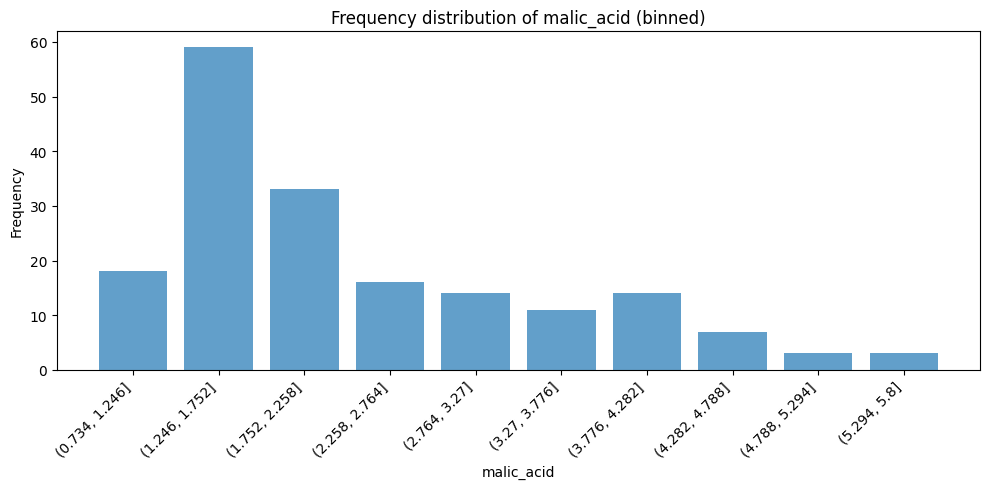

In [32]:
import matplotlib.pyplot as plt

# freq_table assumed to have columns: 'Interval' (pd.Interval) and 'Frequency'
x_labels = freq_table['Interval'].astype(str)

plt.figure(figsize=(10, 5))
plt.bar(x_labels, freq_table['Frequency'], alpha=0.7, color='C0')
plt.xticks(rotation=45, ha='right')
plt.xlabel(selected_attr)
plt.ylabel('Frequency')
plt.title(f'Frequency distribution of {selected_attr} (binned)')
plt.tight_layout()
plt.show()

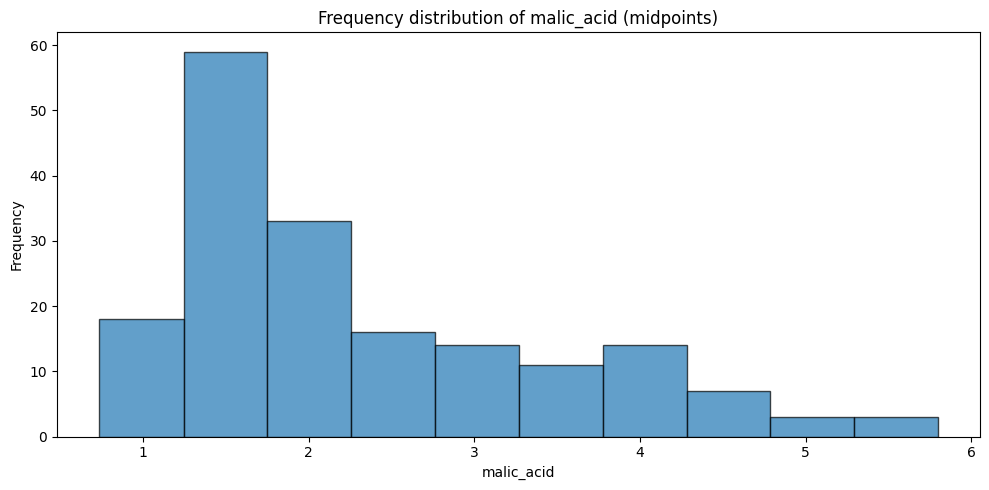

In [33]:
import matplotlib.pyplot as plt

# requires 'Interval' column of Interval objects (from pd.cut)
midpoints = freq_table['Interval'].apply(lambda iv: iv.mid)
widths = freq_table['Interval'].apply(lambda iv: iv.right - iv.left)

plt.figure(figsize=(10, 5))
plt.bar(midpoints, freq_table['Frequency'], width=widths, align='center', alpha=0.7, color='C0', edgecolor='k')
plt.xlabel(selected_attr)
plt.ylabel('Frequency')
plt.title(f'Frequency distribution of {selected_attr} (midpoints)')
plt.tight_layout()
plt.show()

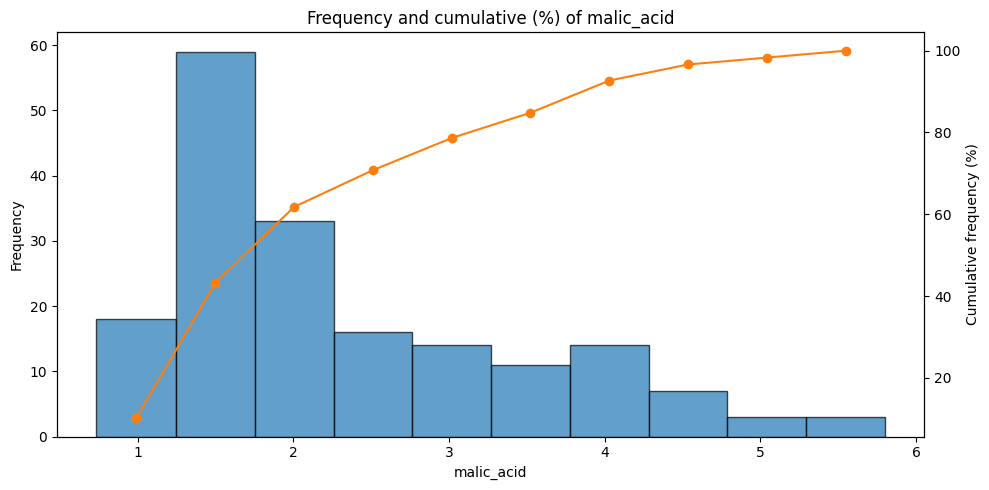

In [35]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# bars (midpoint version)
ax1.bar(midpoints, freq_table['Frequency'], width=widths, alpha=0.7, color='C0', edgecolor='k')
ax1.set_ylabel('Frequency')

# cumulative (as percent)
cum_pct = freq_table['Frequency'].cumsum() / freq_table['Frequency'].sum() * 100
ax2.plot(midpoints, cum_pct, color='C1', marker='o')
ax2.set_ylabel('Cumulative frequency (%)')

ax1.set_xlabel(selected_attr)
ax1.set_title(f'Frequency and cumulative (%) of {selected_attr}')
plt.tight_layout()
plt.show()

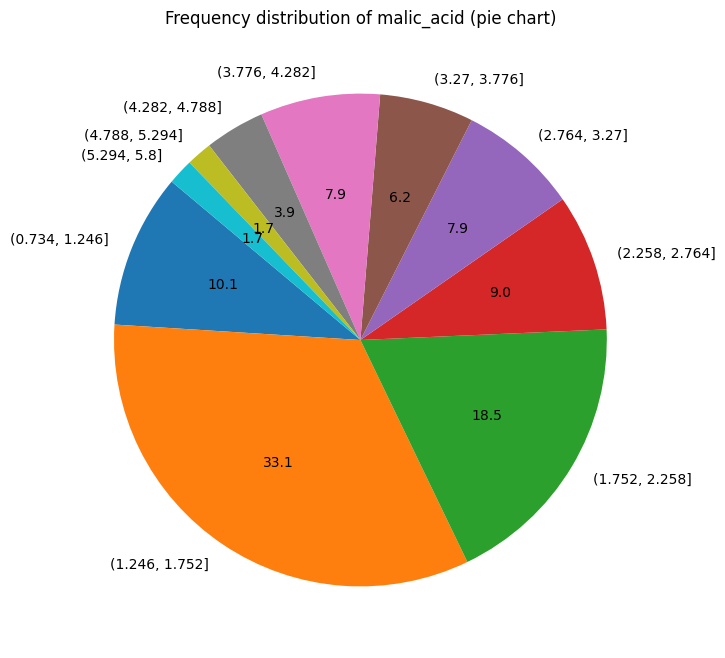

In [36]:
# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_table['Frequency'], labels=x_labels, autopct='%1.1f', startangle=140)
plt.title(f'Frequency distribution of {selected_attr} (pie chart)')
plt.show()

# Analysis Part 2: Confidence Interval

## Part 1:

Calculate the 90%, 95%, and 99% confidence intervals for the mean with $\sigma$ know.

$$
\bar{X} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

We will load the data from `"data/wine_dataset_assignment.csv"` and use the `alcohol` column for our analysis.

We will first get the $\bar{X}$, $\sigma$, and $n$ values.

Then we will get 32 random sample from the data and calculate the confidence intervals for each of the confidence levels mentioned above.

Finally, we will plot the confidence intervals along with the sample means.

In [1]:
DATA_DIR_PATH = "../data"
DATA_FILE_NAME = "wine_dataset_assignment.csv"

In [2]:
import pandas as pd

data = pd.read_csv(f"{DATA_DIR_PATH}/{DATA_FILE_NAME}")

In [3]:
# mean of the alcohol column
mean_alcohol = data["alcohol"].mean()
# standard deviation of the alcohol column
std_alcohol = data["alcohol"].std()
# number of samples in the alcohol column
n_alcohol = data["alcohol"].shape[0]
mean_alcohol, std_alcohol, n_alcohol

(np.float64(13.00061797752809), np.float64(0.8118265380058575), 178)

We will calculate the $Z_{\alpha/2}$ values for the confidence levels 90%, 95%, and 99%.

In [4]:
import scipy.stats as stats

confidence_levels = [0.90, 0.95, 0.99]
z_values = [stats.norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]
z_values

[np.float64(1.644853626951472),
 np.float64(1.959963984540054),
 np.float64(2.5758293035489004)]

In [5]:
# calculate the confidence intervals for 32 random samples
import numpy as np

sample_size = 32

confidence_intervals = {cl: [] for cl in confidence_levels}
sample_means = []

sample = data["alcohol"].sample(n=sample_size, replace=True)
sample_mean = sample.mean()
sample_means.append(sample_mean)

for cl, z in zip(confidence_levels, z_values):
    margin_of_error = z * (std_alcohol / np.sqrt(sample_size))
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    confidence_intervals[cl].append((ci_lower, ci_upper))

In [6]:
# output the confidence intervals
confidence_intervals

{0.9: [(np.float64(12.559881245657897), np.float64(13.031993754342105))],
 0.95: [(np.float64(12.51465912406728), np.float64(13.07721587593272))],
 0.99: [(np.float64(12.426275052681017), np.float64(13.165599947318984))]}

In [7]:
# print them in the format: Confidence Level: (Lower Bound, Upper Bound)
for cl in confidence_levels:
    ci = confidence_intervals[cl][0]
    print(f"Confidence Level {cl*100}%: ({ci[0]}, {ci[1]})")

Confidence Level 90.0%: (12.559881245657897, 13.031993754342105)
Confidence Level 95.0%: (12.51465912406728, 13.07721587593272)
Confidence Level 99.0%: (12.426275052681017, 13.165599947318984)


In [8]:
import matplotlib.pyplot as plt

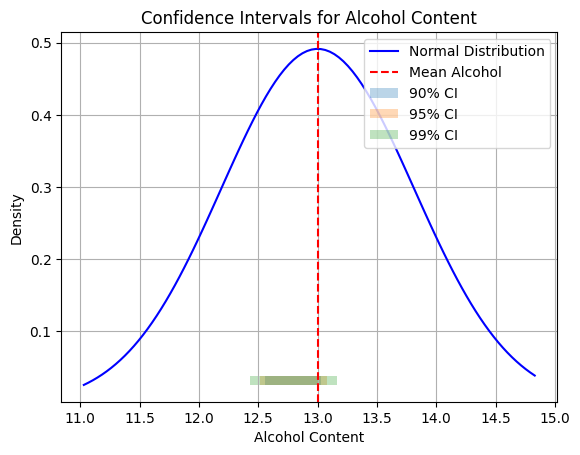

In [9]:
# plot the confidence intervals on a graph with a normal distribution of the alcohol data
x = np.linspace(data["alcohol"].min(), data["alcohol"].max(), 100)
y = stats.norm.pdf(x, mean_alcohol, std_alcohol)
plt.plot(x, y, label="Normal Distribution", color="blue")
plt.axvline(mean_alcohol, color="red", linestyle="--", label="Mean Alcohol")
for cl in confidence_levels:
    ci = confidence_intervals[cl][0]
    plt.fill_betweenx(y, ci[0], ci[1], alpha=0.3, label=f"{int(cl*100)}% CI")
plt.title("Confidence Intervals for Alcohol Content")
plt.grid(True)
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part 2:

Now we will do the same as above but with $\sigma$ unknown.

$$
\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

In [10]:
# take a sample size of 16 (assume normal distribution)
sample_size_unknown = 16

confidence_intervals_unknown = {cl: [] for cl in confidence_levels}
sample_means_unknown = []

sample_unknown = data["alcohol"].sample(n=sample_size_unknown, replace=True)
sample_mean_unknown = sample_unknown.mean()
sample_means_unknown.append(sample_mean_unknown)
sample_std_unknown = sample_unknown.std()

for cl in confidence_levels:
    t_value = stats.t.ppf(1 - (1 - cl) / 2, df=sample_size_unknown - 1)
    margin_of_error_unknown = t_value * (sample_std_unknown / np.sqrt(sample_size_unknown))
    ci_lower_unknown = sample_mean_unknown - margin_of_error_unknown
    ci_upper_unknown = sample_mean_unknown + margin_of_error_unknown
    confidence_intervals_unknown[cl].append((ci_lower_unknown, ci_upper_unknown))

In [11]:
# print the confidence intervals for unknown sigma (min, max)
for cl in confidence_levels:
    ci = confidence_intervals_unknown[cl][0]
    print(f"Confidence Level {cl*100}% (Unknown σ): ({ci[0]}, {ci[1]})")

Confidence Level 90.0% (Unknown σ): (12.242298512842272, 13.156451487157728)
Confidence Level 95.0% (Unknown σ): (12.143637700341364, 13.255112299658636)
Confidence Level 99.0% (Unknown σ): (11.931072384463272, 13.467677615536727)


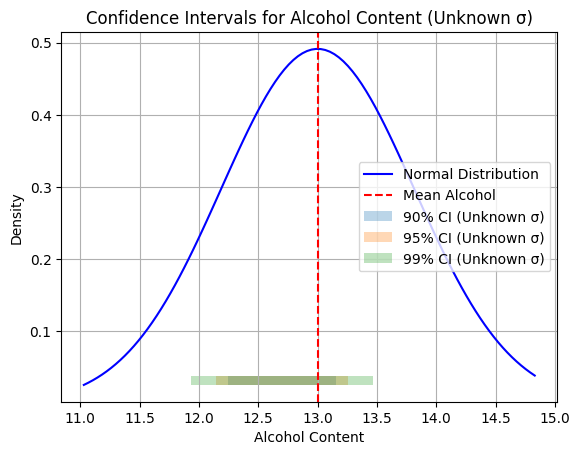

In [12]:
# plot the confidence intervals for unknown sigma on a graph with a normal distribution of the alcohol data
plt.plot(x, y, label="Normal Distribution", color="blue")
plt.axvline(mean_alcohol, color="red", linestyle="--", label="Mean Alcohol")
for cl in confidence_levels:
    ci = confidence_intervals_unknown[cl][0]
    plt.fill_betweenx(y, ci[0], ci[1], alpha=0.3, label=f"{int(cl*100)}% CI (Unknown σ)")
plt.title("Confidence Intervals for Alcohol Content (Unknown σ)")
plt.grid(True)
plt.xlabel("Alcohol Content")
plt.ylabel("Density")
plt.legend()
plt.show()

In [13]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# ==============================================================================
# SECTION 3: Confidence Interval for Mean (Unknown Sigma, Small Sample)
# Requirements:
# 1. Unknown population standard deviation (use sample std 's').
# 2. Small sample size (n <= 16).
# 3. Assume Normal Distribution (use T-Distribution).
# 4. Confidence Levels: 90%, 95%, 99%.
# 5. Must calculate and print the length of the interval.
# [cite_start]Source [cite: 12, 13, 14]
# ==============================================================================

print("-" * 60)
print("SECTION 3: CI for Mean (Unknown Sigma, Small Sample n=16)")
print("-" * 60)

# [cite_start]1. Randomly sample 16 observations (n <= 16 as required) [cite: 12]
# [cite_start]We use a different random_state to ensure observations are different from previous sections [cite: 13]
n_small = 16
sample_small = data["alcohol"].sample(n=n_small, replace=False, random_state=101)

# 2. Calculate Sample Statistics
# We use sample standard deviation (s) because population sigma is unknown
x_bar_small = sample_small.mean()
s_small = sample_small.std(ddof=1)  # ddof=1 for unbiased estimator (sample variance)

print(f"Sample Size (n): {n_small}")
print(f"Sample Mean (x_bar): {x_bar_small:.4f}")
print(f"Sample Std Dev (s): {s_small:.4f}\n")

confidence_levels = [0.90, 0.95, 0.99]

for cl in confidence_levels:
    alpha = 1 - cl
    df = n_small - 1  # Degrees of freedom for T-distribution
    
    # [cite_start]Calculate critical T-value [cite: 14]
    # ppf takes the cumulative probability (1 - alpha/2) for a two-tailed test
    t_critical = stats.t.ppf(1 - alpha/2, df)
    
    # Calculate Margin of Error
    # Formula: t * (s / sqrt(n))
    margin_of_error = t_critical * (s_small / np.sqrt(n_small))
    
    # Calculate Bounds
    lower_bound = x_bar_small - margin_of_error
    upper_bound = x_bar_small + margin_of_error
    
    # [cite_start]Calculate the size/length of the confidence interval [cite: 14]
    interval_length = upper_bound - lower_bound
    
    print(f"Confidence Level: {int(cl*100)}%")
    print(f"Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print(f"Interval Length: {interval_length:.4f}")
    print("." * 30)



------------------------------------------------------------
SECTION 3: CI for Mean (Unknown Sigma, Small Sample n=16)
------------------------------------------------------------
Sample Size (n): 16
Sample Mean (x_bar): 13.1812
Sample Std Dev (s): 0.7520

Confidence Level: 90%
Interval: (12.8517, 13.5108)
Interval Length: 0.6592
..............................
Confidence Level: 95%
Interval: (12.7805, 13.5820)
Interval Length: 0.8014
..............................
Confidence Level: 99%
Interval: (12.6273, 13.7352)
Interval Length: 1.1080
..............................


In [14]:

# ==============================================================================
# SECTION 4: Confidence Interval for Proportion
# Requirements:
# 1. Create a ratio/proportion on a variable (e.g., % of wines > 13.0 alcohol).
# 2. Confidence Levels: 90%, 95%, 99%.
# 3. Must calculate and print the length of the interval.
# [cite_start]Source [cite: 15, 16, 17]
# ==============================================================================

print("\n" + "-" * 60)
print("SECTION 4: CI for Proportion")
print("-" * 60)

# 1. Define the Condition for the Proportion
# We will check the proportion of wines with high alcohol content (> 13.5)
threshold = 13.5
print(f"Condition: Wines with Alcohol content > {threshold}")

# 2. Take a random sample for this analysis
# While the text mentions 16 for section 3, proportions generally need larger samples 
# for valid approximation. We will use n=50 here to simulate a distinct study.
n_prop = 50
sample_prop_data = data["alcohol"].sample(n=n_prop, replace=False, random_state=202)

# 3. Calculate Sample Proportion (p_hat)
# Count how many wines meet the condition (Successes)
num_successes = (sample_prop_data > threshold).sum()
p_hat = num_successes / n_prop

print(f"Sample Size (n): {n_prop}")
print(f"Number of Successes: {num_successes}")
print(f"Sample Proportion (p_hat): {p_hat:.4f}")

# Check assumption: n*p and n*(1-p) should generally be > 10 for normal approx
if n_prop * p_hat < 10 or n_prop * (1 - p_hat) < 10:
    print("(Note: Sample size/proportion might be small for perfect Normal approximation)")

print("")

for cl in confidence_levels:
    alpha = 1 - cl
    
    # For proportions, we use the Z-distribution (Normal)
    z_critical = stats.norm.ppf(1 - alpha/2)
    
    # Calculate Standard Error for Proportion
    # Formula: sqrt( (p_hat * (1 - p_hat)) / n )
    standard_error = np.sqrt((p_hat * (1 - p_hat)) / n_prop)
    
    # Calculate Margin of Error
    margin_of_error_prop = z_critical * standard_error
    
    # Calculate Bounds
    lower_bound_p = p_hat - margin_of_error_prop
    upper_bound_p = p_hat + margin_of_error_prop
    
    # Clip bounds to be between 0 and 1 (since probability cannot exceed these)
    lower_bound_p = max(0.0, lower_bound_p)
    upper_bound_p = min(1.0, upper_bound_p)
    
    # [cite_start]Calculate the size/length of the confidence interval [cite: 17]
    interval_length_p = upper_bound_p - lower_bound_p
    
    print(f"Confidence Level: {int(cl*100)}%")
    print(f"Interval: ({lower_bound_p:.4f}, {upper_bound_p:.4f})")
    print(f"Interval Length: {interval_length_p:.4f}")
    print("." * 30)


------------------------------------------------------------
SECTION 4: CI for Proportion
------------------------------------------------------------
Condition: Wines with Alcohol content > 13.5
Sample Size (n): 50
Number of Successes: 16
Sample Proportion (p_hat): 0.3200

Confidence Level: 90%
Interval: (0.2115, 0.4285)
Interval Length: 0.2170
..............................
Confidence Level: 95%
Interval: (0.1907, 0.4493)
Interval Length: 0.2586
..............................
Confidence Level: 99%
Interval: (0.1501, 0.4899)
Interval Length: 0.3399
..............................


# ANOVA Analysis $\chi$ Tests

### Task 3, Part 1: Hypothesis Testing for Two Means

**Task Description:**
1. Select **two different groups** of your choice (from at least four groups that make up the database from the first task).
   * Sample **6%** of the observations from the first group.
   * Sample **10%** of the observations from the second group.
   * *Note: Round the resulting sample sizes to the nearest integer.*

2. Conduct a statistical test regarding the **difference in expectations** (means):
   $$\mu_1 - \mu_2$$

3. Formulate an **alternative hypothesis** ($H_1$) based on your logic, the specific sample results, and the overall nature of the database.

4. State your conclusion for the following three confidence levels (separate cases):
   * **90%** (Significance level $\alpha = 0.10$)
   * **95%** (Significance level $\alpha = 0.05$)
   * **99%** (Significance level $\alpha = 0.01$)

**Statistical Framework:**
* **Null Hypothesis:** $H_0: \mu_1 = \mu_2$ (or $\mu_1 - \mu_2 = 0$)
* **Alternative Hypothesis:** * $H_1: \mu_1 \neq \mu_2$ (Two-tailed)
    * $H_1: \mu_1 > \mu_2$ (Right-tailed)
    * $H_1: \mu_1 < \mu_2$ (Left-tailed)

In [1]:
# load the data
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
DATA_PATH = "/content/sample_data/wine_dataset_assignment.csv"

In [9]:
data = pd.read_csv(DATA_PATH)
display(data.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [10]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [11]:
# 1. Define the groups (selecting Group 0 and Group 1 from the Wine dataset)
group_0_all = data[data['target'] == 0]['alcohol']
group_1_all = data[data['target'] == 1]['alcohol']

In [12]:
# 2. Calculate sample sizes (6% and 10%) and round to nearest integer
n0 = int(round(len(group_0_all) * 0.06))
n1 = int(round(len(group_1_all) * 0.10))

print(f"Sampling {n0} observations from Group 0 (6% of {len(group_0_all)})")
print(f"Sampling {n1} observations from Group 1 (10% of {len(group_1_all)})")

Sampling 4 observations from Group 0 (6% of 59)
Sampling 7 observations from Group 1 (10% of 71)


In [13]:
# 3. Perform the sampling (using a random seed for reproducibility)
sample_0 = group_0_all.sample(n=n0, random_state=42)
sample_1 = group_1_all.sample(n=n1, random_state=42)

In [14]:
# 4. Conduct the Independent Samples T-Test
# We use equal_var=False (Welch's T-test) as a safer default for different sample sizes
t_stat, p_value = stats.ttest_ind(sample_0, sample_1, equal_var=False)

print(f"\nTest Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Test Results:
T-statistic: 6.9706
P-value: 0.0022


In [15]:
# 5. Evaluate at different confidence levels
confidence_levels = [0.90, 0.95, 0.99]

print("\nConclusions:")
for cl in confidence_levels:
    alpha = 1 - cl
    if p_value < alpha:
        result = "Reject H0"
        conclusion = f"Significant difference found at {cl*100}% confidence."
    else:
        result = "Fail to Reject H0"
        conclusion = f"No significant difference found at {cl*100}% confidence."

    print(f"Level {cl*100}% (alpha={alpha:.2f}): {result} - {conclusion}")


Conclusions:
Level 90.0% (alpha=0.10): Reject H0 - Significant difference found at 90.0% confidence.
Level 95.0% (alpha=0.05): Reject H0 - Significant difference found at 95.0% confidence.
Level 99.0% (alpha=0.01): Reject H0 - Significant difference found at 99.0% confidence.


### Task 3, Part 2: Hypothesis Testing with Fixed Minimum Samples

**Task Description:**
1. Continuing from the previous question, for **2 other groups** that were not sampled (or using the remaining observations):
   * Sample at least **32 observations** from each group.
2. Perform a test on the **difference in expectations** (means).
3. Formulate any **alternative hypothesis** ($H_1$).
   * *Note: It is recommended to choose a different hypothesis than the one used in the previous question.*
4. State your conclusion at the following confidence levels: **90%, 95%, and 99%** (three separate cases).

In [16]:
# 1. Identify the groups not used or the remaining data
# For this example, let's assume we use Group 0 and Group 2 this time
group_A_all = data[data['target'] == 0]['alcohol']
group_B_all = data[data['target'] == 2]['alcohol']

In [17]:
# 2. Sample at least 32 observations from each
# Note: Check if the groups have at least 32 members first
n_required = 32

sample_A = group_A_all.sample(n=n_required, random_state=7)
sample_B = group_B_all.sample(n=n_required, random_state=7)

print(f"Sampled {n_required} observations from Group 0 and Group 2.")

Sampled 32 observations from Group 0 and Group 2.


In [18]:
# 3. Conduct the test for difference in means
# Let's use a One-Tailed test this time (e.g., H1: Group 0 > Group 2)
# to differentiate it from Task 1 as requested.
t_stat, p_value_two_tailed = stats.ttest_ind(sample_A, sample_B, equal_var=False)

# Adjust p-value for a one-tailed test (H1: Mean A > Mean B)
# We divide by 2 and check if the t-stat is positive
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)

print(f"\n--- One-Tailed Hypothesis Test (H1: μ_A > μ_B) ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")


--- One-Tailed Hypothesis Test (H1: μ_A > μ_B) ---
T-statistic: 5.0318
One-tailed P-value: 0.0000


In [19]:
# 4. Evaluation at 90%, 95%, and 99%
conf_levels = [0.90, 0.95, 0.99]

for cl in conf_levels:
    alpha = 1 - cl
    status = "Reject H0" if p_value_one_tailed < alpha else "Fail to Reject H0"
    print(f"Confidence {cl*100}% (α={alpha:.2f}): {status}")

Confidence 90.0% (α=0.10): Reject H0
Confidence 95.0% (α=0.05): Reject H0
Confidence 99.0% (α=0.01): Reject H0


### Task 3, Part 3: Variance Ratio and Test Validity

**Task Description:**
1. Using the same 2 groups and samples from the previous questions, perform a test on the **ratio of variances** (using the $F$-distribution or Student's $t$ / $T_0$ context).
2. Formulate an **alternative hypothesis** ($H_1$) for the variances.
3. State your conclusion at confidence levels: **90%, 95%, and 99%**.
4. **Critical Analysis:** Based on these variance results, was the test you performed for the **difference in means** ($T_0$) technically valid?
5. To what extent do your sample variances differ from the true population variances (the known $\sigma$ values provided with the dataset)?

In [20]:
# 1. Setup the Variance Test (F-test)
# We will use the samples from Task 2 (sample_A and sample_B)
var_A = np.var(sample_A, ddof=1)
var_B = np.var(sample_B, ddof=1)

# F-statistic is the ratio of variances
f_stat = var_A / var_B
df_A = len(sample_A) - 1
df_B = len(sample_B) - 1

# Calculate p-value for Two-Tailed F-test
p_value_var = 2 * min(stats.f.cdf(f_stat, df_A, df_B), 1 - stats.f.cdf(f_stat, df_A, df_B))

print(f"Sample Variance A: {var_A:.4f}")
print(f"Sample Variance B: {var_B:.4f}")
print(f"F-statistic (Ratio): {f_stat:.4f}")
print(f"P-value for Variance Test: {p_value_var:.4f}")

Sample Variance A: 0.1991
Sample Variance B: 0.2307
F-statistic (Ratio): 0.8630
P-value for Variance Test: 0.6842


In [21]:
# 2. Evaluate at confidence levels
conf_levels = [0.90, 0.95, 0.99]
for cl in conf_levels:
    alpha = 1 - cl
    if p_value_var < alpha:
        print(f"At {cl*100}%: Reject Equal Variances (Variances are significantly different).")
    else:
        print(f"At {cl*100}%: Fail to Reject (Variances are assumed equal).")

At 90.0%: Fail to Reject (Variances are assumed equal).
At 95.0%: Fail to Reject (Variances are assumed equal).
At 99.0%: Fail to Reject (Variances are assumed equal).


In [22]:
# 3. Comparison with Population Variance
# Sklearn wine dataset doesn't provide 'true' sigma,
# but we treat the full dataset variance as the population variance.
pop_var_A = data[data['target'] == 0]['alcohol'].var()
pop_var_B = data[data['target'] == 2]['alcohol'].var()

print(f"\n--- Population Comparison ---")
print(f"Group A: Sample Var = {var_A:.4f}, Pop Var = {pop_var_A:.4f}")
print(f"Group B: Sample Var = {var_B:.4f}, Pop Var = {pop_var_B:.4f}")


--- Population Comparison ---
Group A: Sample Var = 0.1991, Pop Var = 0.2136
Group B: Sample Var = 0.2307, Pop Var = 0.2812


# Task 4:
Analysis of Variance (ANOVA):

In this task, we perform a One-Way ANOVA to compare the means of the three wine classes.
 - According to the instructions2, we must:Sample specific percentages from each group: 15% from the first group, 25% from the second, and 35% from the third.
 - Round up the sample sizes to the nearest integer (Ceiling).Calculate the Sum of Squares:$SS_{Total}$ (SST): The total variability in the data.
 - $SS_{Between}$ (SSB): The variability between the group means.
 - $SS_{Within}$ (SSW): The variability within each individual group.

 Conclude at 90%, 95%, and 99% confidence levels based on the p-value.

In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import math

# --- Task 4: ANOVA ---

# 1. Setup Groups
group_0 = data[data['target'] == 0]['alcohol']
group_1 = data[data['target'] == 1]['alcohol']
group_2 = data[data['target'] == 2]['alcohol']

# 2. Calculate sample sizes with Ceiling (rounding up)
# 15% for Group 0, 25% for Group 1, 35% for Group 2
n0 = math.ceil(len(group_0) * 0.15)
n1 = math.ceil(len(group_1) * 0.25)
n2 = math.ceil(len(group_2) * 0.35)

print(f"Sampling Sizes: Group 0={n0}, Group 1={n1}, Group 2={n2}")

# 3. Perform Random Sampling
samp_0 = group_0.sample(n=n0, random_state=1)
samp_1 = group_1.sample(n=n1, random_state=1)
samp_2 = group_2.sample(n=n2, random_state=1)

# Combine samples for calculations
all_samples = np.concatenate([samp_0, samp_1, samp_2])
grand_mean = np.mean(all_samples)

# 4. Calculate SSB, SSW, SST manually
# SSB (Sum of Squares Between) = sum(n_i * (mean_i - grand_mean)^2)
means = [np.mean(samp_0), np.mean(samp_1), np.mean(samp_2)]
ns = [len(samp_0), len(samp_1), len(samp_2)]
SSB = sum([n * (m - grand_mean)**2 for n, m in zip(ns, means)])

# SSW (Sum of Squares Within) = sum((x_ij - mean_i)^2)
SSW = sum([(x - np.mean(samp_0))**2 for x in samp_0]) + \
      sum([(x - np.mean(samp_1))**2 for x in samp_1]) + \
      sum([(x - np.mean(samp_2))**2 for x in samp_2])

# SST (Total Sum of Squares)
SST = SSB + SSW

print(f"\nANOVA Calculations:")
print(f"SSB (Between): {SSB:.4f}")
print(f"SSW (Within):  {SSW:.4f}")
print(f"SST (Total):   {SST:.4f}")

# 5. Perform F-Oneway Test (Automatic check)
f_stat, p_value_anova = stats.f_oneway(samp_0, samp_1, samp_2)

print(f"\nF-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value_anova:.4f}")

# 6. Conclusions
conf_levels = [0.90, 0.95, 0.99]
print("\nConclusions for ANOVA:")
for cl in conf_levels:
    alpha = 1 - cl
    if p_value_anova < alpha:
        print(f"At {cl*100}% (alpha={alpha:.2f}): Reject H0 (Means are different).")
    else:
        print(f"At {cl*100}% (alpha={alpha:.2f}): Fail to Reject H0.")

Sampling Sizes: Group 0=9, Group 1=18, Group 2=17

ANOVA Calculations:
SSB (Between): 16.1571
SSW (Within):  10.1799
SST (Total):   26.3371

F-Statistic: 32.5367
P-Value: 0.0000

Conclusions for ANOVA:
At 90.0% (alpha=0.10): Reject H0 (Means are different).
At 95.0% (alpha=0.05): Reject H0 (Means are different).
At 99.0% (alpha=0.01): Reject H0 (Means are different).


# Task 5: Goodness of Fit Test ($\chi^2$)
- Explanation:This task requires checking how well a subset of the data fits a specific theoretical distribution3.
- Selection: We will use the alcohol variable and assume it follows a Normal Distribution.Sampling: We sample approximately 30% of the observations.
- Binning: Since alcohol is continuous, we cannot run a Chi-Square test directly.
- We must divide the data into categories ("bins"). We will use equal-frequency bins based on the theoretical normal distribution.
- Testing: We compare the Observed frequencies in each bin against the Expected frequencies using the Chi-Square Goodness of Fit test.

In [24]:
# --- Task 5: Goodness of Fit Test ---

# 1. Sample 30% of the data (using the 'alcohol' variable)
sample_gof = data['alcohol'].sample(frac=0.30, random_state=42)
print(f"\n--- Goodness of Fit Test ---")
print(f"Sample size: {len(sample_gof)}")

# 2. Define Distribution (Normal) parameters based on sample
mu_hat = sample_gof.mean()
sigma_hat = sample_gof.std()

# 3. Create Bins for Chi-Square (observed vs expected)
# We divide the data into 5 equal-frequency bins (quintiles) based on the theoretical distribution
num_bins = 5
# Create bin edges using the theoretical normal distribution
bin_edges = stats.norm.ppf(np.linspace(0, 1, num_bins + 1), loc=mu_hat, scale=sigma_hat)
# Fix infinity edges for the first and last bins to capture all data
bin_edges[0] = -np.inf
bin_edges[-1] = np.inf

# Calculate Observed Frequencies (O_i)
observed_freq, _ = np.histogram(sample_gof, bins=bin_edges)

# Calculate Expected Frequencies (E_i)
# For equal probability bins, expected count is Total_N / Num_Bins
expected_freq = np.full(num_bins, len(sample_gof) / num_bins)

print(f"Observed counts: {observed_freq}")
print(f"Expected counts: {expected_freq}")

# 4. Perform Chi-Square Test
chi2_stat, p_value_gof = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value_gof:.4f}")

# 5. Conclusions
print("\nConclusions for Goodness of Fit (H0: Data follows Normal Dist):")
for cl in conf_levels:
    alpha = 1 - cl
    if p_value_gof < alpha:
        print(f"At {cl*100}%: Reject H0 (Data does NOT fit the distribution).")
    else:
        print(f"At {cl*100}%: Fail to Reject H0 (Data fits the distribution).")


--- Goodness of Fit Test ---
Sample size: 53
Observed counts: [15  6  6 14 12]
Expected counts: [10.6 10.6 10.6 10.6 10.6]
Chi2 Statistic: 7.0943
P-Value: 0.1310

Conclusions for Goodness of Fit (H0: Data follows Normal Dist):
At 90.0%: Fail to Reject H0 (Data fits the distribution).
At 95.0%: Fail to Reject H0 (Data fits the distribution).
At 99.0%: Fail to Reject H0 (Data fits the distribution).


In [25]:
# --- Task 6: Test for Independence ---

# 1. Prepare Variables
# Variable A: Target (already categorical: 0, 1, 2)
# Variable B: Color Intensity (Continuous -> needs binning)

# Binning Color Intensity into 3 categories: Low, Medium, High
data['color_cat'] = pd.qcut(data['color_intensity'], q=3, labels=["Low", "Medium", "High"])

# 2. Create Contingency Table (Cross-tabulation)
contingency_table = pd.crosstab(data['target'], data['color_cat'])

print(f"\n--- Independence Test (Target vs Color Intensity) ---")
print("Contingency Table:")
print(contingency_table)

# 3. Perform Chi-Square Test for Independence
chi2_ind, p_value_ind, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi2 Statistic: {chi2_ind:.4f}")
print(f"P-Value: {p_value_ind:.4f}")

# 4. Conclusions
print("\nConclusions for Independence (H0: Variables are Independent):")
for cl in conf_levels:
    alpha = 1 - cl
    if p_value_ind < alpha:
        print(f"At {cl*100}%: Reject H0 (Variables are DEPENDENT).")
    else:
        print(f"At {cl*100}%: Fail to Reject H0 (Variables are independent).")


--- Independence Test (Target vs Color Intensity) ---
Contingency Table:
color_cat  Low  Medium  High
target                      
0            3      30    26
1           56      13     2
2            0      16    32

Chi2 Statistic: 122.4557
P-Value: 0.0000

Conclusions for Independence (H0: Variables are Independent):
At 90.0%: Reject H0 (Variables are DEPENDENT).
At 95.0%: Reject H0 (Variables are DEPENDENT).
At 99.0%: Reject H0 (Variables are DEPENDENT).


In [26]:
# --- 1. Setup and Sampling ---
# Sample 30% of the entire dataset's alcohol column
sample_gof = data['alcohol'].sample(frac=0.30, random_state=99)
n_samples = len(sample_gof)

print(f"\n--- Goodness of Fit Test (Normal Distribution) ---")
print(f"Sample size (30%): {n_samples}")

# --- 2. Define Theoretical Distribution ---
# We estimate parameters (mean and std) from the sample itself
mu_est = sample_gof.mean()
sigma_est = sample_gof.std()

# --- 3. Create Bins for Chi-Square ---
# We divide the data into 5 bins.
# We calculate the bin edges using the percentiles of the Normal Distribution (ppf)
# This ensures that 'Expected' frequency is equal for all bins if H0 is true.
num_bins = 5
bin_edges = stats.norm.ppf(np.linspace(0, 1, num_bins + 1), loc=mu_est, scale=sigma_est)

# Adjust first and last edge to -inf and +inf to capture all outliers
bin_edges[0] = -np.inf
bin_edges[-1] = np.inf

# Count Observed frequencies
observed_freq, _ = np.histogram(sample_gof, bins=bin_edges)

# Calculate Expected frequencies
# Since we used quantiles for bin edges, expected freq is total_N / num_bins
expected_freq = np.full(num_bins, n_samples / num_bins)

print(f"Observed Frequencies: {observed_freq}")
print(f"Expected Frequencies: {expected_freq}")

# --- 4. Perform Chi-Square Test ---
chi2_stat_gof, p_value_gof = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

print(f"Chi2 Statistic: {chi2_stat_gof:.4f}")
print(f"P-Value: {p_value_gof:.4f}")

# --- 5. Conclusions ---
print("\n--- Conclusions (Goodness of Fit) ---")
for cl in confidence_levels:
    alpha = 1 - cl
    if p_value_gof < alpha:
        print(f"Confidence {cl*100}%: Reject H0 - Data does NOT follow the Normal distribution.")
    else:
        print(f"Confidence {cl*100}%: Fail to Reject H0 - Data fits the Normal distribution.")


--- Goodness of Fit Test (Normal Distribution) ---
Sample size (30%): 53
Observed Frequencies: [12  9  7 14 11]
Expected Frequencies: [10.6 10.6 10.6 10.6 10.6]
Chi2 Statistic: 2.7547
P-Value: 0.5997

--- Conclusions (Goodness of Fit) ---
Confidence 90.0%: Fail to Reject H0 - Data fits the Normal distribution.
Confidence 95.0%: Fail to Reject H0 - Data fits the Normal distribution.
Confidence 99.0%: Fail to Reject H0 - Data fits the Normal distribution.


# Task 6: $\chi^2$ Test for Independence
- Explanation: This task examines the relationship between two specific variables.

- Hypothesis: We suspect there is a dependency between Target (the type of wine) and Color Intensity.

- Transformation: While Target is categorical (0, 1, 2), color_intensity is continuous. To perform a Chi-Square test, we must convert color_intensity into categories. We will bin it into three levels: "Low", "Medium", and "High".

- Contingency Table: We create a cross-tabulation table showing the frequency of wines for every combination of Target and Color Category.

Test: We run the chi2_contingency test to determine if the variables are statistically independent.

In [27]:
# --- 1. Variable Selection and Transformation ---
# We test dependency between 'target' and 'color_intensity'
# Convert 'color_intensity' into 3 categorical bins (Low, Medium, High)
data['color_category'] = pd.qcut(data['color_intensity'], q=3, labels=["Low", "Medium", "High"])

# --- 2. Create Contingency Table ---
contingency_table = pd.crosstab(data['target'], data['color_category'])

print(f"\n--- Chi-Square Test for Independence ---")
print("Variables: 'Target' vs 'Color Intensity (Categorized)'")
print("\nContingency Table (Observed):")
print(contingency_table)

# --- 3. Perform Chi-Square Independence Test ---
chi2_stat_ind, p_value_ind, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi2 Statistic: {chi2_stat_ind:.4f}")
print(f"P-Value: {p_value_ind:.4f}")

# --- 4. Conclusions ---
print("\n--- Conclusions (Independence) ---")
# H0: The variables are Independent
# H1: The variables are Dependent
for cl in confidence_levels:
    alpha = 1 - cl
    if p_value_ind < alpha:
        print(f"Confidence {cl*100}%: Reject H0 - The variables are DEPENDENT.")
    else:
        print(f"Confidence {cl*100}%: Fail to Reject H0 - The variables are Independent.")


--- Chi-Square Test for Independence ---
Variables: 'Target' vs 'Color Intensity (Categorized)'

Contingency Table (Observed):
color_category  Low  Medium  High
target                           
0                 3      30    26
1                56      13     2
2                 0      16    32

Chi2 Statistic: 122.4557
P-Value: 0.0000

--- Conclusions (Independence) ---
Confidence 90.0%: Reject H0 - The variables are DEPENDENT.
Confidence 95.0%: Reject H0 - The variables are DEPENDENT.
Confidence 99.0%: Reject H0 - The variables are DEPENDENT.
